In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import csv
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("...../Titanic/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train.shape

(891, 12)

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
traindf, validdf = train_test_split(train, test_size=0.25, random_state=42)

In [9]:
traindf = traindf[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
validdf = validdf[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]

In [10]:
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
298,1,1,male,NaN,0,0,30.5000,C106,S
884,0,3,male,25.00,0,0,7.0500,NaN,S
247,1,2,female,24.00,0,2,14.5000,NaN,S
478,0,3,male,22.00,0,0,7.5208,NaN,S
305,1,1,male,0.92,1,2,151.5500,C22 C26,S


In [11]:
np.where(np.isnan(validdf.Age))

(array([  0,   6,  12,  17,  24,  32,  33,  37,  39,  42,  43,  63,  64,
         83,  89,  93,  94, 110, 112, 114, 128, 130, 131, 132, 136, 148,
        150, 153, 154, 155, 156, 157, 161, 163, 164, 167, 175, 187, 188,
        205, 208, 213, 214, 219, 220]),)

In [12]:
train['Age'].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [13]:
from sklearn.preprocessing import Imputer

In [14]:
imp = Imputer(missing_values='NaN',strategy = 'median',axis =0)
temp = imp.fit_transform(traindf[['Age','Fare']])

In [15]:
traindf['Age_Mod'] = temp[:,0]
traindf['Fare_Mod'] = temp[:,1]

In [16]:
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Mod,Fare_Mod
298,1,1,male,NaN,0,0,30.5000,C106,S,28.00,30.5000
884,0,3,male,25.00,0,0,7.0500,NaN,S,25.00,7.0500
247,1,2,female,24.00,0,2,14.5000,NaN,S,24.00,14.5000
478,0,3,male,22.00,0,0,7.5208,NaN,S,22.00,7.5208
305,1,1,male,0.92,1,2,151.5500,C22 C26,S,0.92,151.5500


In [17]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
temp = imp.fit_transform(validdf[['Age', 'Fare']])

In [18]:
validdf['Age_Mod'] = temp[:,0]
validdf['Fare_Mod'] = temp[:,1]

In [19]:
traindf = traindf[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked','Age_Mod','Fare_Mod']]
validdf = validdf[['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked','Age_Mod','Fare_Mod']]

In [20]:
traindf.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Mod,Fare_Mod
298,1,1,male,0,0,S,28.00,30.5000
884,0,3,male,0,0,S,25.00,7.0500
247,1,2,female,0,2,S,24.00,14.5000
478,0,3,male,0,0,S,22.00,7.5208
305,1,1,male,1,2,S,0.92,151.5500


In [21]:
PClass_Dummy = pd.get_dummies(traindf.Pclass, prefix='PClass').iloc[:,1:]
traindf = pd.concat([traindf, PClass_Dummy],axis=1);

In [22]:
traindf.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Mod,Fare_Mod,PClass_2,PClass_3
298,1,1,male,0,0,S,28.00,30.5000,0,0
884,0,3,male,0,0,S,25.00,7.0500,0,1
247,1,2,female,0,2,S,24.00,14.5000,1,0
478,0,3,male,0,0,S,22.00,7.5208,0,1
305,1,1,male,1,2,S,0.92,151.5500,0,0


In [23]:
PSex_Dummy = pd.get_dummies(traindf.Sex, prefix='Sex').iloc[:,1:]
traindf = pd.concat([traindf, PSex_Dummy],axis=1);

In [24]:
Sib_Dummy = pd.get_dummies(traindf.SibSp, prefix='SibSp').iloc[:,1:]
traindf = pd.concat([traindf, Sib_Dummy],axis=1);

In [25]:
Parch_Dummy = pd.get_dummies(traindf.Parch, prefix='Parch').iloc[:,1:]
traindf = pd.concat([traindf, Parch_Dummy],axis=1);

In [26]:
Em_Dummy = pd.get_dummies(traindf.Embarked, prefix='Embarked').iloc[:,1:]
traindf = pd.concat([traindf, Em_Dummy],axis=1);

In [27]:
traindf.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Mod,Fare_Mod,PClass_2,PClass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
298,1,1,male,0,0,S,28.00,30.5000,0,0,...,0,0,0,0,0,0,0,0,0,1
884,0,3,male,0,0,S,25.00,7.0500,0,1,...,0,0,0,0,0,0,0,0,0,1
247,1,2,female,0,2,S,24.00,14.5000,1,0,...,0,0,0,1,0,0,0,0,0,1
478,0,3,male,0,0,S,22.00,7.5208,0,1,...,0,0,0,0,0,0,0,0,0,1
305,1,1,male,1,2,S,0.92,151.5500,0,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
PClass_Dummy = pd.get_dummies(validdf.Pclass, prefix='PClass').iloc[:,1:]
validdf = pd.concat([validdf, PClass_Dummy],axis=1);
PSex_Dummy = pd.get_dummies(validdf.Sex,prefix='Sex').iloc[:,1:]
validdf =  pd.concat([validdf,PSex_Dummy],axis=1)
Sib_Dummy = pd.get_dummies(validdf.SibSp,prefix='SibSp').iloc[:,1:]
validdf =  pd.concat([validdf,Sib_Dummy],axis=1)
Parch_Dummy = pd.get_dummies(validdf.Parch,prefix='Parch').iloc[:,1:]
validdf =  pd.concat([validdf,Parch_Dummy],axis=1)
Em_Dummy = pd.get_dummies(validdf.Embarked,prefix='Embarked').iloc[:,1:]
validdf =  pd.concat([validdf,Em_Dummy],axis=1)

In [29]:
validdf.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Mod,Fare_Mod,PClass_2,PClass_3,...,SibSp_2,SibSp_3,SibSp_4,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Embarked_Q,Embarked_S
709,1,3,male,1,1,C,29.0,15.2458,0,1,...,0,0,0,1,0,0,0,0,0,0
439,0,2,male,0,0,S,31.0,10.5000,1,0,...,0,0,0,0,0,0,0,0,0,1
840,0,3,male,0,0,S,20.0,7.9250,0,1,...,0,0,0,0,0,0,0,0,0,1
720,1,2,female,0,1,S,6.0,33.0000,1,0,...,0,0,0,1,0,0,0,0,0,1
39,1,3,female,1,0,C,14.0,11.2417,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
trainTemp, validTemp = train_test_split(traindf, test_size=0.20, random_state=42)

In [32]:
XTrain = trainTemp.iloc[:,range(6, trainTemp.shape[1])]

YTrain = trainTemp['Survived']

XValid = validTemp.iloc[:,range(6, validTemp.shape[1])]

YValid = validTemp['Survived']

In [33]:
XTrain.columns

Index(['Age_Mod', 'Fare_Mod', 'PClass_2', 'PClass_3', 'Sex_male', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [34]:
XTrain.dtypes

Age_Mod       float64
Fare_Mod      float64
PClass_2        uint8
PClass_3        uint8
Sex_male        uint8
SibSp_1         uint8
SibSp_2         uint8
SibSp_3         uint8
SibSp_4         uint8
SibSp_5         uint8
SibSp_8         uint8
Parch_1         uint8
Parch_2         uint8
Parch_3         uint8
Parch_4         uint8
Parch_5         uint8
Parch_6         uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [35]:
YTrain.shape

(534,)

In [36]:
modeldf = LogisticRegression()
modeldf.fit(XTrain, YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predicted = modeldf.predict(XValid)
print(predicted)

[1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1]


In [38]:
prob = modeldf.predict_proba(XValid)

In [39]:
probOne = prob[:,1]

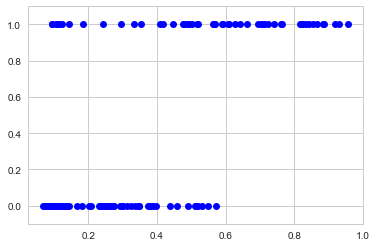

In [40]:
plt.plot(probOne, YValid, 'bo')
plt.ylim([-0.1, 1.1])
plt.show()

In [41]:
from sklearn import metrics

In [42]:
metrics.confusion_matrix(YValid, predicted)

array([[74,  6],
       [19, 35]])

In [43]:
print(metrics.classification_report(YValid, predicted))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86        80
          1       0.85      0.65      0.74        54

avg / total       0.82      0.81      0.81       134

